In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing

%matplotlib inline

In [2]:
model_summary_df = pd.read_csv("model_summary.csv", index_col=0)

In [3]:
model_summary_df

,Total_Purchases,Average_Product_Price
0,0,5.00000
1,717,4.13250
2,1112,4.04750
3,1239,4.12875
4,1318,4.06375
...,...,...
95,1305,3.99250
96,1312,4.06250
97,1296,4.09375
98,1292,4.06000


In [5]:
model_summary_df['Revenue'] = model_summary_df['Total_Purchases'] * model_summary_df['Average_Product_Price']

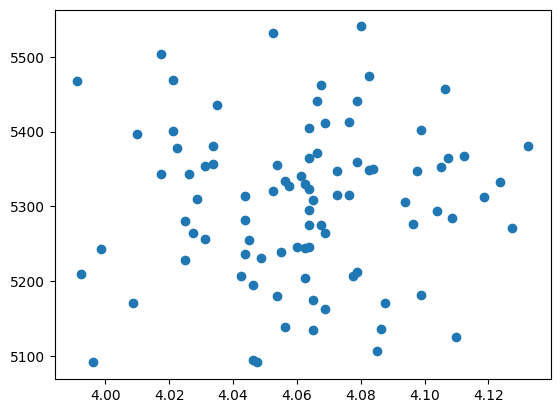

In [7]:
plt.scatter('Average_Product_Price', 'Revenue', data=model_summary_df[10:])

In [3]:
asp = model_summary_df[10:]['Average_Product_Price'].values

In [4]:
units = model_summary_df[10:]['Total_Purchases'].values

In [14]:
np.median(asp)

4.06375

In [15]:
np.mean(asp)

4.061555555555556

In [8]:
norm_asp = (asp-min(asp))/min(asp)

In [9]:
norm_units = (units-min(units))/min(units)

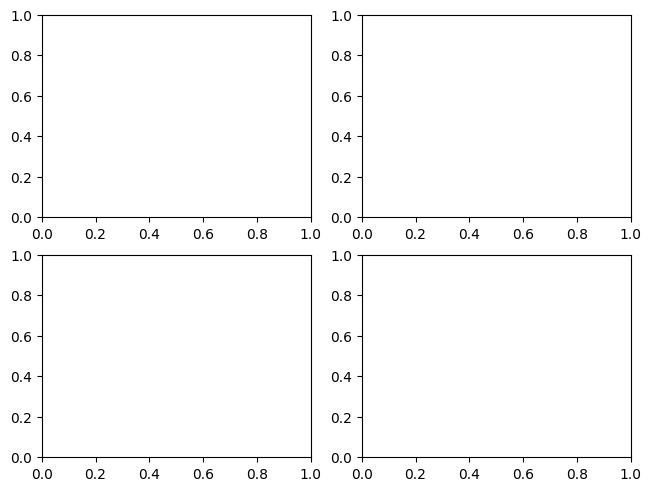

In [27]:
fig, axs = plt.subplots(2, 2, layout="constrained")

In [33]:
import seaborn as sns

In [34]:
sns.pairplot(norm_asp,norm_units)

TypeError: pairplot() takes 1 positional argument but 2 were given

In [26]:
norm_transform_figure = plt.figure()
norm_transform_figure.subplots(layout="constrained")


ax1_asp_hist = norm_transform_figure.add_subplot(2,2,1)
ax2_asp_norm_hist = norm_transform_figure.add_subplot(2,2,2)
ax3_units_hist = norm_transform_figure.add_subplot(2,2,3)
ax4_units_norm_hist = norm_transform_figure.add_subplot(2,2,4)

ax1_asp_hist.set_title("Average Sales Price")
ax2_asp_norm_hist.set_title("Normalized Average Sales Price")
ax3_units_hist.set_title("Units Purchased")
ax4_units_norm_hist.set_title("Normalizd Units Purchased")

ax1_asp_hist.hist(asp)
ax2_asp_norm_hist.hist(norm_asp)


TypeError: FigureBase.subplots() got an unexpected keyword argument 'layout'

<Figure size 640x480 with 0 Axes>

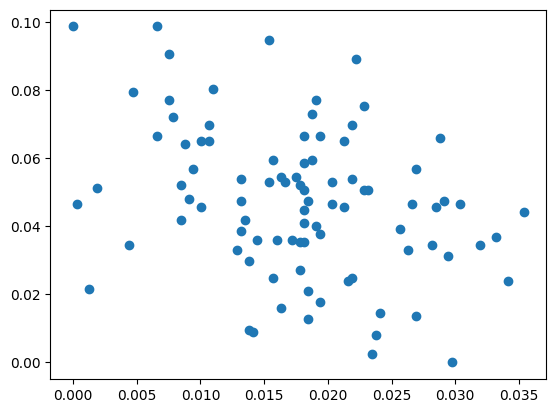

In [12]:
plt.scatter(norm_asp,norm_units)

In [35]:
pct_mean_asp = (np.mean(asp)-asp)/np.mean(asp)

In [36]:
pct_mean_units = (np.mean(units)-units)/np.mean(units)

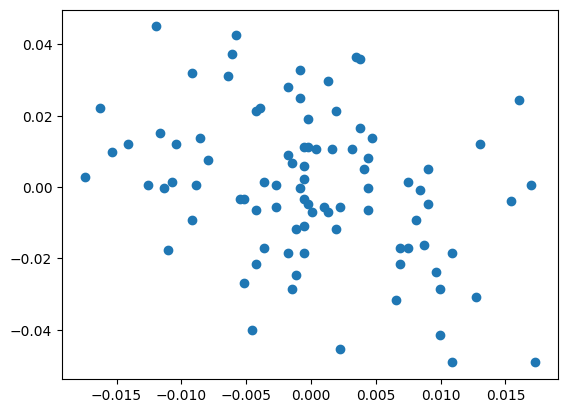

In [37]:
plt.scatter(pct_mean_asp,pct_mean_units)

In [38]:
norm_df = pd.DataFrame()

In [39]:
norm_df['norm_asp'] = norm_asp

In [40]:
norm_df['norm_units'] = norm_units

In [41]:
pct_df = pd.DataFrame()

In [42]:
pct_df['pct_mean_asp'] = pct_mean_asp

In [43]:
pct_df['pct_mean_units'] = pct_mean_units

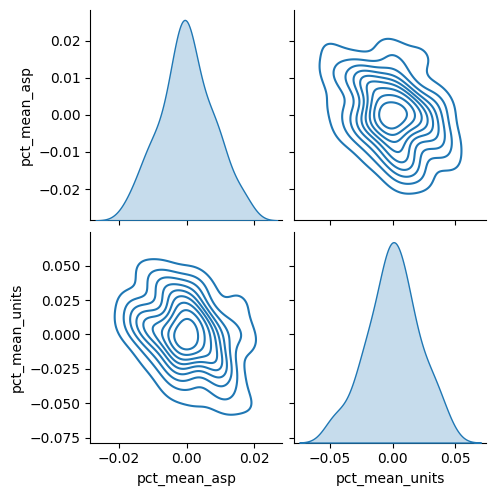

In [45]:
sns.pairplot(pct_df, kind="kde")

In [101]:
norm_mod = smf.ols(formula='norm_units ~ norm_asp', data=norm_df)

In [102]:
norm_res = norm_mod.fit()

In [103]:
print(norm_res.summary())

                            OLS Regression Results                            
Dep. Variable:             norm_units   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     11.61
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           0.000991
Time:                        16:09:08   Log-Likelihood:                 222.81
No. Observations:                  90   AIC:                            -441.6
Df Residuals:                      88   BIC:                            -436.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0637      0.005     11.964      0.0

In [72]:
pct_mod = smf.ols(formula='pct_mean_units ~ pct_mean_asp -1', data=pct_df)

In [73]:
pct_res = pct_mod.fit()

In [74]:
print(pct_res.summary())

                                 OLS Regression Results                                
Dep. Variable:         pct_mean_units   R-squared (uncentered):                   0.117
Model:                            OLS   Adj. R-squared (uncentered):              0.107
Method:                 Least Squares   F-statistic:                              11.74
Date:                Wed, 15 Mar 2023   Prob (F-statistic):                    0.000927
Time:                        15:04:05   Log-Likelihood:                          226.96
No. Observations:                  90   AIC:                                     -451.9
Df Residuals:                      89   BIC:                                     -449.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

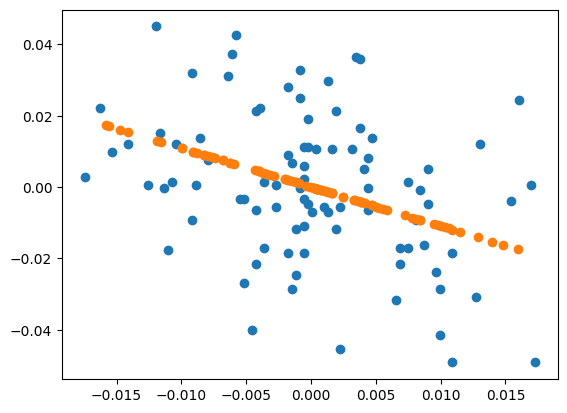

In [75]:
fig, ax = plt.subplots()
ax.scatter('pct_mean_asp', 'pct_mean_units', data=pct_df)
ax.scatter(pct_res.predict(), 'pct_mean_asp', data=pct_df)

In [77]:
agent_data = pd.read_pickle("agent_summary.pkl")

In [123]:
agent_data[agent_data['Household_Size'] >= 3]

Household_Size  Purchased_This_Step  Pantry_Stock  Pantry_Max  \
Step AgentID                                                                  
0    3                     3                    0      3.000000           3   
     9                     6                    0      8.000000           8   
     10                    3                    0      4.000000           4   
     11                    3                    0      4.000000           4   
     20                    6                    0      7.000000           7   
...                      ...                  ...           ...         ...   
99   986                   4                    0      3.043361           5   
     988                   5                    0      3.533232           5   
     992                   4                    1      3.564151           4   
     994                   3                    1      4.849196           5   
     995                   3                    0      2.152056           4   

              Pantry_Min Purchase_Behavior  Minimum_Purchase_Needed  \
Step AgentID                                                          
0    3               0.3       buy_minimum                        0   
     9               0.6       buy_minimum                        0   
     10              0.3       buy_minimum                        0   
     11              0.3       buy_minimum                        0   
     20              0.6       buy_minimum                        0   
...                  ...               ...                      ...   
99   986             0.4  buy_some_or_none                        0   
     988             0.5  buy_some_or_none                        0   
     992             0.4       buy_maximum                        0   
     994             0.3       buy_maximum                        0   
     995             0.3  buy_some_or_none                        0   

              Current_Product_Price  Last_Product_Price  
Step AgentID                                             
0    3                          5.0                5.00  
     9                          5.0                5.00  
     10                         5.0                5.00  
     11                         5.0                5.00  
     20                         5.0                5.00  
...                             ...                 ...  
99   986                        2.5                2.50  
     988                        5.0                2.50  
     992                        2.5                3.75  
     994                        2.5                5.00  
     995                        5.0                5.00  

[34800 rows x 9 columns]

In [148]:
agent_1 = agent_data.xs(988, level='AgentID').reset_index()[10:]

In [149]:
agent_1['Current_Product_Price']

10    5.00
11    2.50
12    5.00
13    2.50
14    5.00
      ... 
95    5.00
96    3.75
97    2.50
98    2.50
99    5.00
Name: Current_Product_Price, Length: 90, dtype: float64

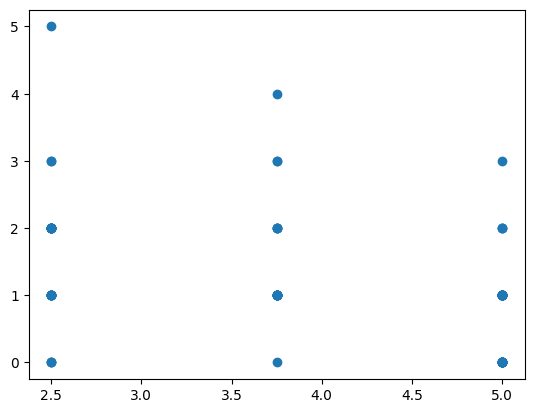

In [150]:
fig_a1, ax_a1 = plt.subplots()
ax_a1.scatter('Current_Product_Price', 'Purchased_This_Step', data=agent_1)


In [151]:
def get_percent_change_from_mean(array):
    mean = np.mean(array)
    return ((mean-array)/mean)

In [152]:
agent_units = get_percent_change_from_mean(agent_1['Purchased_This_Step'])

In [153]:
agent_price = get_percent_change_from_mean(agent_1['Current_Product_Price'])

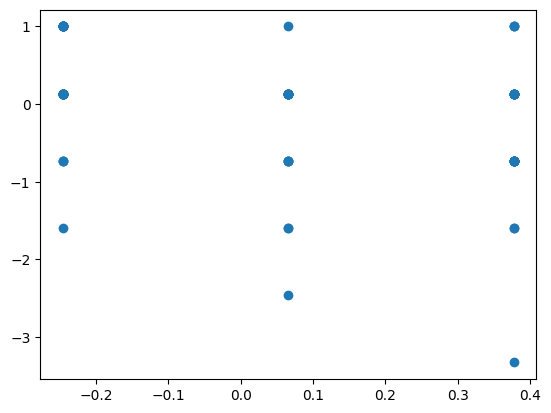

In [154]:
plt.scatter(agent_price, agent_units)

In [155]:
agent_1['pct_mean_asp'] = agent_price

In [156]:
agent_1['pct_mean_units'] = agent_units

In [157]:
agent_pct_mod = smf.ols(formula='pct_mean_units ~ pct_mean_asp -1', data=agent_1)

In [158]:
agent_pct_res = agent_pct_mod.fit()

In [159]:
print(agent_pct_res.summary())

                                 OLS Regression Results                                
Dep. Variable:         pct_mean_units   R-squared (uncentered):                   0.175
Model:                            OLS   Adj. R-squared (uncentered):              0.166
Method:                 Least Squares   F-statistic:                              18.86
Date:                Wed, 15 Mar 2023   Prob (F-statistic):                    3.72e-05
Time:                        16:35:44   Log-Likelihood:                         -101.76
No. Observations:                  90   AIC:                                      205.5
Df Residuals:                      89   BIC:                                      208.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------